<a href="https://colab.research.google.com/github/Faheemfemu/EDA-on-HotelBooking-data-Analysis/blob/main/Hotel_Booking_Analysis_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> Have you ever wondered when the best time of year to book a hotel room is? Or the optimal length of stay in order to get the best daily rate? What if you wanted to predict whether or not a hotel was likely to receive a disproportionately high number of special requests? This hotel booking dataset can help you explore those questions!

## <b>This data set contains booking information for a city hotel and a resort hotel, and includes information such as when the booking was made, length of stay, the number of adults, children, and/or babies, and the number of available parking spaces, among other things. All personally identifying information has been removed from the data. </b>

## <b> Explore and analyze the data to discover important factors that govern the bookings. </b>

In [ ]:
#importing all relevant python libraries  
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
#mounting drive
from google.colab import drive 
drive.mount('/content/drive')



Mounted at /content/drive


In [ ]:
file_path='/content/drive/MyDrive/AlmaBetter/Module 1 : Python for Data Science/Team Capstone Projects/ Hotel Bookings.csv' #file  location
hotel_boking_data=pd.read_csv(file_path) #reading dataset

**Data Inspection**

In [ ]:
hotel_boking_data.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [ ]:
hotel_boking_data.tail()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,No Deposit,394.0,NaN,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,No Deposit,9.0,NaN,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,No Deposit,9.0,NaN,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,No Deposit,89.0,NaN,0,Transient,104.40,0,0,Check-Out,2017-09-07
119389,City Hotel,0,205,2017,August,35,29,2,7,2,...,No Deposit,9.0,NaN,0,Transient,151.20,0,2,Check-Out,2017-09-07


In [ ]:
hotel_boking_data.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

In [ ]:
hotel_boking_data.shape

(119390, 32)

In [ ]:
hotel_boking_data.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


In [ ]:
hotel_boking_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

# **Data cleaning**

**Checking & removing duplicate rows**

In [ ]:
#check duplicate values
hotel_boking_data.duplicated().value_counts()

False    87396
True     31994
dtype: int64

In [ ]:
#drop all duplicates
hotel_boking_data.drop_duplicates(inplace=True)

In [ ]:
hotel_boking_data.shape

(87396, 32)

**Handling missing values**

In [ ]:
#checking sum of all null values
hotel_boking_data.isnull().sum().sort_values(ascending=False)

company                           82137
agent                             12193
country                             452
children                              4
reserved_room_type                    0
assigned_room_type                    0
booking_changes                       0
deposit_type                          0
hotel                                 0
previous_cancellations                0
days_in_waiting_list                  0
customer_type                         0
adr                                   0
required_car_parking_spaces           0
total_of_special_requests             0
reservation_status                    0
previous_bookings_not_canceled        0
is_repeated_guest                     0
is_canceled                           0
distribution_channel                  0
market_segment                        0
meal                                  0
babies                                0
adults                                0
stays_in_week_nights                  0


we notice that colunm children=4,country=452,agent=12193 and company=82137 have null values

In [ ]:
hotel_boking_data['children'].unique()

array([ 0.,  1.,  2., 10.,  3., nan])

This column 'children' has 0 as value which means 0 children were present in group of customers who made that transaction.
So, 'nan' values are the missing values due to error of recording data.
We will replace the null values under this column with 0 value of children.

In [ ]:
#replace nan with 0
hotel_boking_data['children'].replace(np.nan ,0, inplace=True)

In [ ]:
#I chacked the mode of agent and fill the null value of mode of agent
agent_mode=hotel_boking_data['agent'].mode()
hotel_boking_data['agent'].fillna(agent_mode[0], inplace=True)

bfill method fills each mising row in the DataFrame with the nearest value below it.This one is called backward-filling

In [ ]:
#bfill method fills each mising row in the DataFrame with the nearest value below it.
hotel_boking_data['country'].fillna(method='bfill', inplace=True)

In [ ]:
#we can replace null values with company's mean values 
hotel_boking_data['company'].fillna(hotel_boking_data['company'].mean(), inplace=True)

In [ ]:
#After handling null values ,now we are checking sum all null values
hotel_boking_data.isnull().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
agent                             0
company                           0
days_in_waiting_list              0
customer_type                     0
adr                         

we can see that there is no null values

**Converting columns to appropriate datatypes.**

In [ ]:
hotel_boking_data['children']=hotel_boking_data['children'].astype(int)
hotel_boking_data['company']=hotel_boking_data['company'].astype(int)
hotel_boking_data['agent']=hotel_boking_data['agent'].astype(int)

**Adding some columns**.

In [ ]:
hotel_boking_data['total_people']=hotel_boking_data['children']+hotel_boking_data['babies']+hotel_boking_data['adults']
hotel_boking_data['total_stay']=hotel_boking_data['stays_in_week_nights']+hotel_boking_data['stays_in_weekend_nights']
hotel_boking_data.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,total_people,total_stay
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,183,0,Transient,0.0,0,0,Check-Out,2015-07-01,2,0
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,183,0,Transient,0.0,0,0,Check-Out,2015-07-01,2,0
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,183,0,Transient,75.0,0,0,Check-Out,2015-07-02,1,1
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,183,0,Transient,75.0,0,0,Check-Out,2015-07-02,1,1
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,183,0,Transient,98.0,0,1,Check-Out,2015-07-03,2,2


In [ ]:
hotel_boking_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 87396 entries, 0 to 119389
Data columns (total 34 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   hotel                           87396 non-null  object 
 1   is_canceled                     87396 non-null  int64  
 2   lead_time                       87396 non-null  int64  
 3   arrival_date_year               87396 non-null  int64  
 4   arrival_date_month              87396 non-null  object 
 5   arrival_date_week_number        87396 non-null  int64  
 6   arrival_date_day_of_month       87396 non-null  int64  
 7   stays_in_weekend_nights         87396 non-null  int64  
 8   stays_in_week_nights            87396 non-null  int64  
 9   adults                          87396 non-null  int64  
 10  children                        87396 non-null  int64  
 11  babies                          87396 non-null  int64  
 12  meal                           

## **EDA(Exploratory Data Analysis)**


### 1.**Correlation Analysis**
It is used to measure the strength of the linear relationship between two variables and compute their association. Correlation analysis calculates the level of change in one variable due to the change in the other. Correlation analysis of the dataset was carried out using a correlation heatmap with all the columns.

**Correlation of the columns**

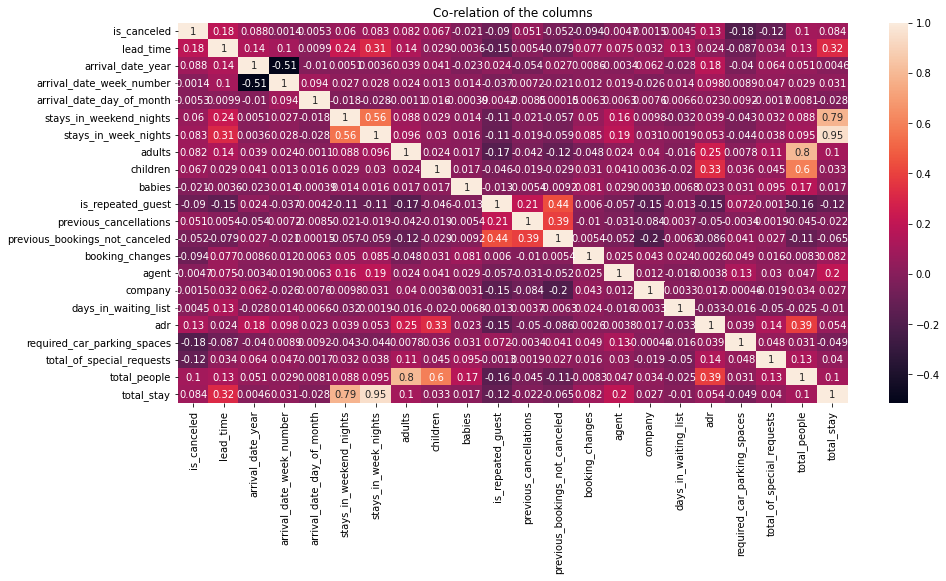

In [ ]:
plt.figure(figsize=(15,7))
sns.heatmap(hotel_boking_data.corr(),annot=True)
plt.title('Co-relation of the columns')
plt.show()

**Insight**

 1. lead_time and total_stay is positively corelated.That means more is the stay of cutsomer more will be the lead time.
2. adults,childrens and babies are corelated to each other. That means more the people more will be adr.
3. is_repeated guest and previous bookings not canceled has strong corelation. may be repeated guests are not more likely to cancel their bookings.
4.adr and total_people is positively coreleted.that's means total people increase hotel make more revenue.

****

**Lets** see reletion between adr and total_stay and what is effect of adr on total_stay

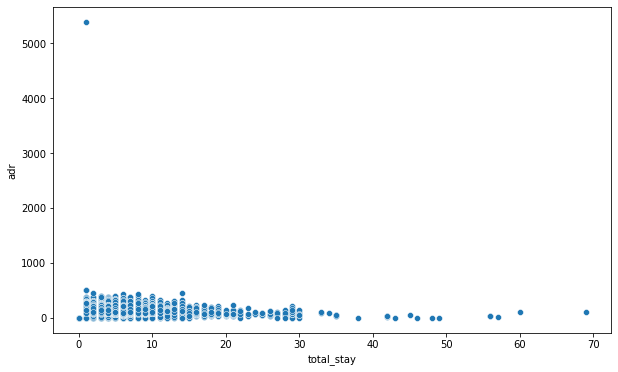

In [ ]:
plt.figure(figsize=(10,6))
sns.scatterplot(y=hotel_boking_data['adr'],x=hotel_boking_data['total_stay'])
plt.title('')
plt.show()

We notice that there is an outlier in adr, so we will remove that for better scatter plot

In [ ]:
hotel_boking_data.drop(hotel_boking_data[hotel_boking_data['adr'] > 5000].index, inplace = True)

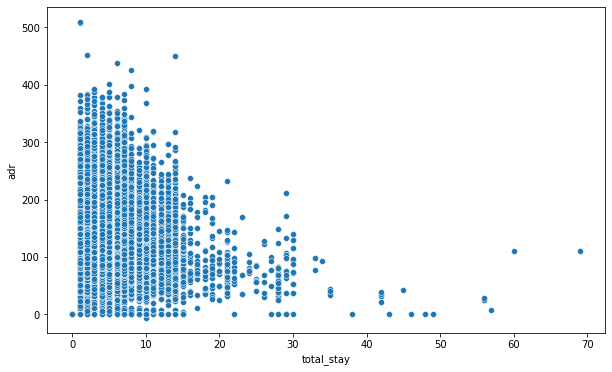

In [ ]:
plt.figure(figsize=(10,6))
sns.scatterplot(y=hotel_boking_data['adr'],x=hotel_boking_data['total_stay'])
plt.show()

From the scatter plot we can see that as length of tottal_stay increases the adr decreases.This means for longer stays customer can get good adr.

## 2.**Univariate Analysis**

**1.Which month has most peak booking?**

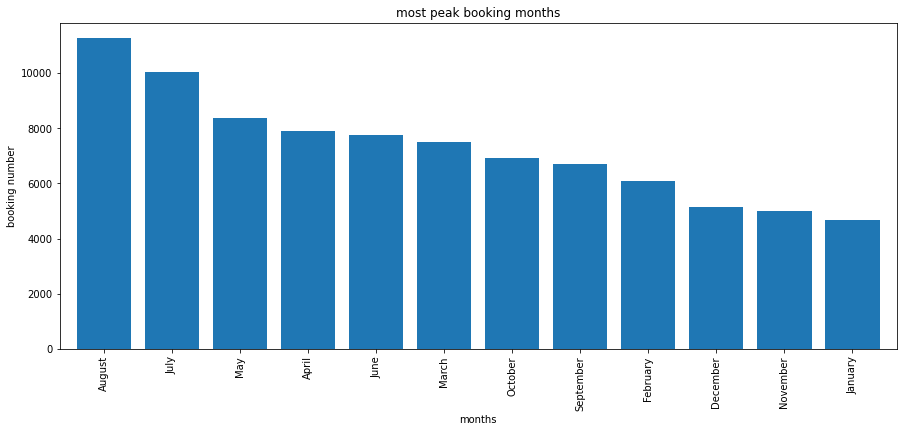

In [ ]:
plt.figure(figsize=(15,6))
hotel_boking_data['arrival_date_month'].value_counts().plot.bar( width=0.8,align='center')
plt.title('most peak booking months')
plt.xlabel('months')
plt.ylabel('booking number')
plt.show()

**Insight**

August and july months had the most Bookings.

**2.which month results in high revenue?**

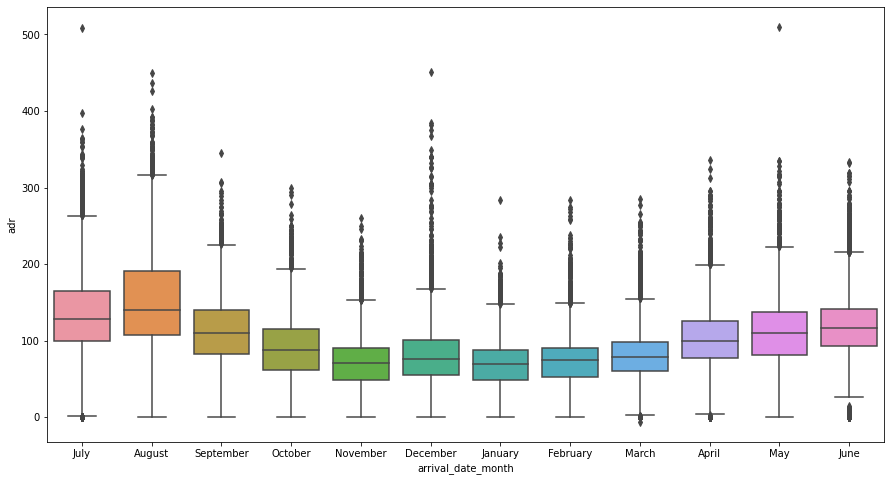

In [ ]:
plt.figure(figsize = (15,8))
sns.boxplot(x = hotel_boking_data['arrival_date_month'],y = hotel_boking_data['adr'])
plt.show()

**Insight**

We can see that Avg adr rises from january upto july and reaches peak at August and then lowers to the November. But hotels do make some good deals with high adr at decmber also.

**3.which agent made the most booking?**

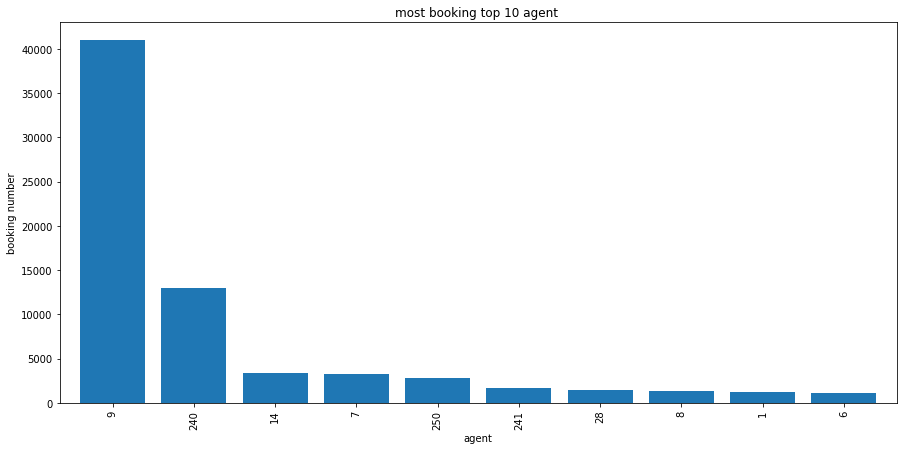

In [ ]:
plt.figure(figsize=(15,7))
hotel_boking_data['agent'].value_counts().head(10).plot.bar(width=0.8,align='center')
plt.title('most booking top 10 agent ')
plt.xlabel('agent')
plt.ylabel('booking number')
plt.show()

**Insight**

Agent ID no: 9 made most of the bookings

**4.Which type hotel mostly preferred by the guest?**

In [ ]:
hotel_boking_data['hotel'].value_counts()

City Hotel      53427
Resort Hotel    33968
Name: hotel, dtype: int64

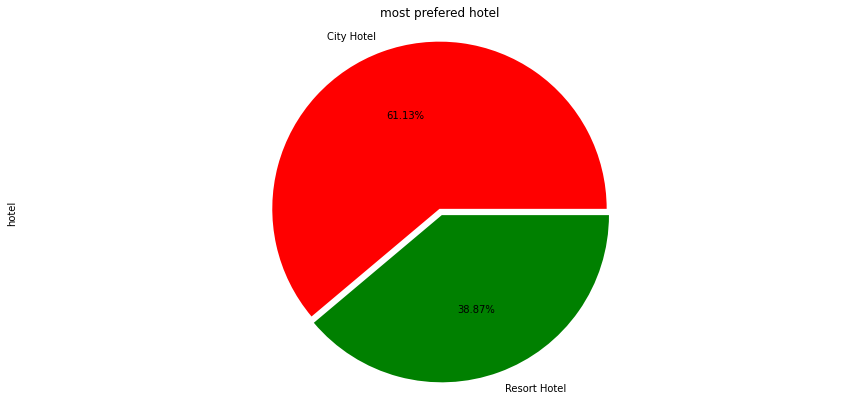

In [ ]:
plt.figure(figsize=(15,7))
hotel_boking_data['hotel'].value_counts().plot.pie(explode=[0.02,0.02],colors=['red','green'],autopct='%.2f%%')
plt.title('most prefered hotel')
plt.axis('equal')
plt.show()

**Insight**

City Hotel is most preferred hotel by guests. 

**5.what is the percentage of cancellation ?**

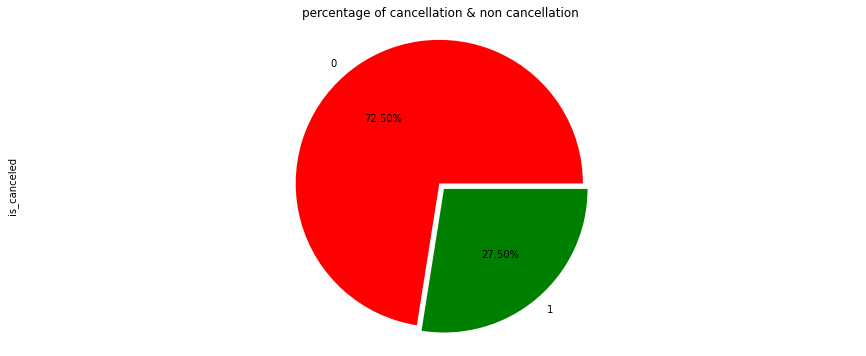

In [ ]:
plt.figure(figsize=(15,6))
hotel_boking_data['is_canceled'].value_counts().plot.pie(explode=[0.03,0.02],colors=['red','green'],autopct='%.2f%%')
plt.title('percentage of cancellation & non cancellation')
plt.axis('equal')
plt.show()


**Insight**

0= not cancled,
1= canceled,
27.5 % of the bookings were cancelled.
72.50 % of bookings are not cancel.

**6.what is the percentage of repeated guest?**

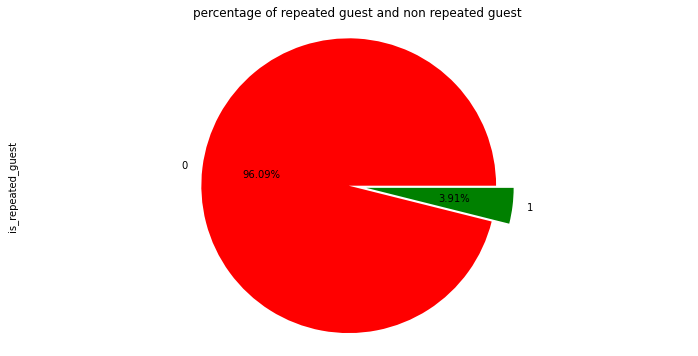

In [ ]:
plt.figure(figsize=(12,6))
hotel_boking_data['is_repeated_guest'].value_counts().plot.pie(explode=[0.02,0.1],colors=['red','green'],autopct='%.2f%%')
plt.title('percentage of repeated guest and non repeated guest')
plt.axis('equal')
plt.show()

**Insight**

0= non repeated guest ,
1= repeated guest,
Repeated guests are very few which only 3.9 %.
In order to retained the guests management should take feedbacks from guests and try to imporve the services.

**7.What is the percentage distribution of customer type?**

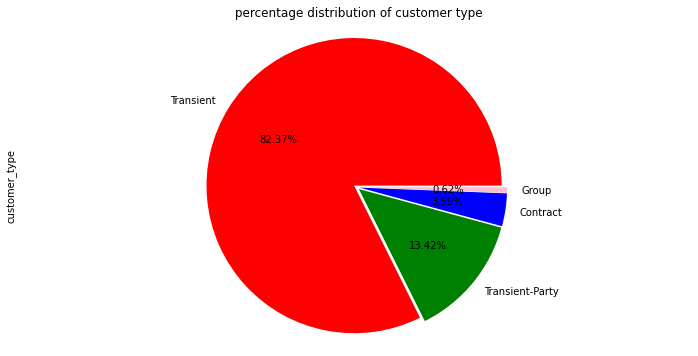

In [ ]:
plt.figure(figsize=(12,6))
hotel_boking_data['customer_type'].value_counts().plot.pie(explode=[0.02,0.02,0.02,0.02],colors=['red','green','blue','pink'],autopct='%.2f%%')
plt.title(' percentage distribution of customer type')
plt.axis('equal')
plt.show()

**Insight**:

Transient customer type has  82.37 %. percentage distribution of customer type.

**8.What is the percentage distribution of required car parking spaces?**

In [ ]:
hotel_boking_data['required_car_parking_spaces'].value_counts()

0    80082
1     7280
2       28
3        3
8        2
Name: required_car_parking_spaces, dtype: int64

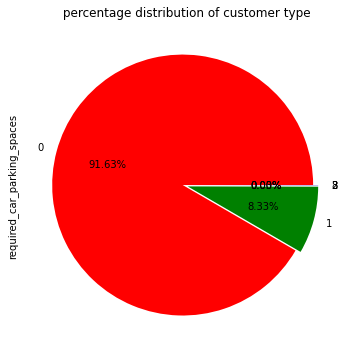

In [ ]:
plt.figure(figsize=(15,6))
hotel_boking_data['required_car_parking_spaces'].value_counts().plot.pie(explode=[0.02,0.02,0.02,0.02,0.02],colors=['red','green','blue','black','yellow'],autopct='%.2f%%')
plt.title(' percentage distribution of customer type')
#plt.axis('equal')
plt.show()

**Insight**:

91.6 % guests did not required the parking space. only 8.3 % guests required only 1 parking space.

**9.what is percentage distribution of deposite type?**

In [ ]:
hotel_boking_data['deposit_type'].value_counts()

No Deposit    86251
Non Refund     1037
Refundable      107
Name: deposit_type, dtype: int64

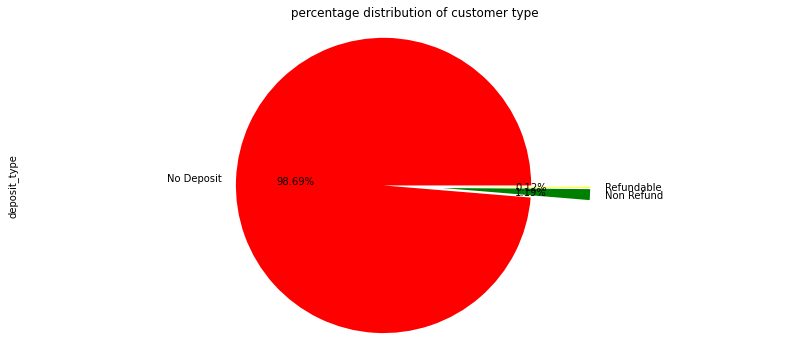

In [ ]:
plt.figure(figsize=(14,6))
hotel_boking_data['deposit_type'].value_counts().plot.pie(explode=[0.2,0.2,0.2],colors=['red','green','yellow'],autopct='%.2f%%')
plt.title(' percentage distribution of customer type')
plt.axis('equal')
plt.show()

**insight**:

98.69 % of the guests prefer "No deposit" type of deposit.

**10.which meal type of food is most preferred meal of  guests**

In [ ]:
hotel_boking_data['meal'].value_counts()

BB           67977
SC            9481
HB            9085
Undefined      492
FB             360
Name: meal, dtype: int64

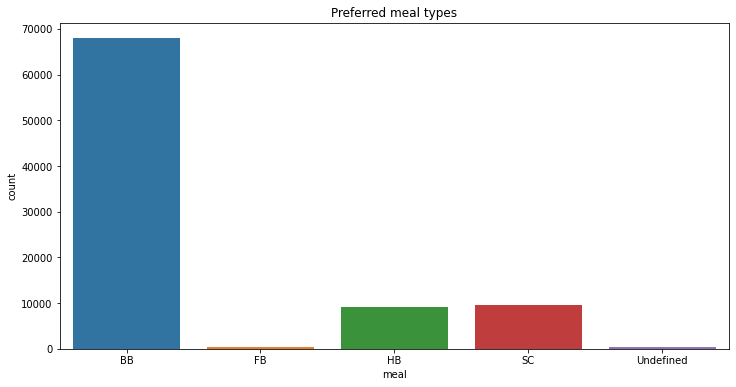

In [ ]:
plt.figure(figsize=(12,6))
sns.countplot(x=hotel_boking_data['meal'])
plt.title('Preferred meal types')
plt.show()

Types of meal in hotels:

* BB - (Bed and Breakfast)
* HB- (Half Board)
* FB- (Full Board)
* SC- (Self Catering)
 
 **Insight**:

 * So the most preferred meal type by the guests is BB( Bed and Breakfast)
 * HB- (Half Board) and SC- (Self Catering) are equally preferred.



**11.Which country the most guest are coming?**

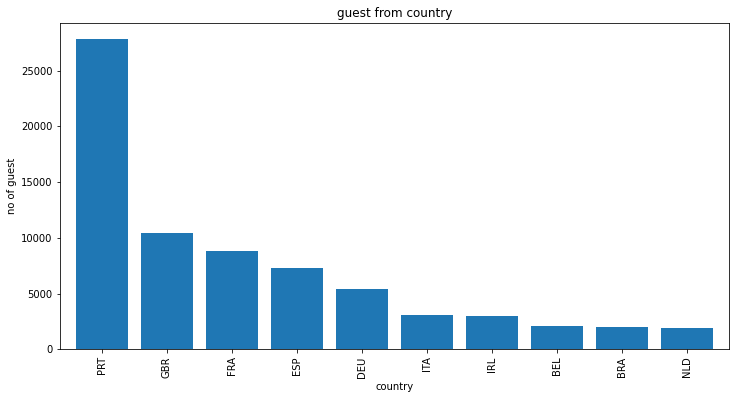

In [ ]:
plt.figure(figsize=(12,6))
hotel_boking_data['country'].value_counts().head(10).sort_values(ascending=False).plot.bar( width=0.8,align='center')
plt.title('guest from country')
plt.xlabel('country')
plt.ylabel('no of guest')
plt.show()

**Insight**:

* Most of the guests are coming from portugal i.e more 25000 guests are from portugal.

  countries-

* PRT- Portugal
* GBR- United Kingdom
* FRA- France
* ESP- Spain
* DEU - Germany
* ITA -Itlay
* IRL - Ireland
* BEL -Belgium
* BRA -Brazil
* NLD-Netherlands

**12.Which is most preffered room type by customers?**

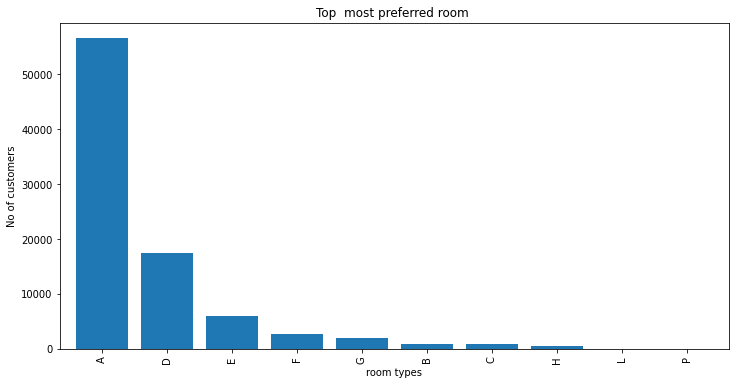

In [ ]:
plt.figure(figsize=(12,6))
hotel_boking_data['reserved_room_type'].value_counts().sort_values(ascending=False).plot.bar( width=0.8,align='center')
plt.title('Top  most preferred room ')
plt.xlabel('room types')
plt.ylabel('No of customers')
plt.show()

 **Insight**:

 The most preferred Room type is "A".

**13.which room type generates highest adr?**

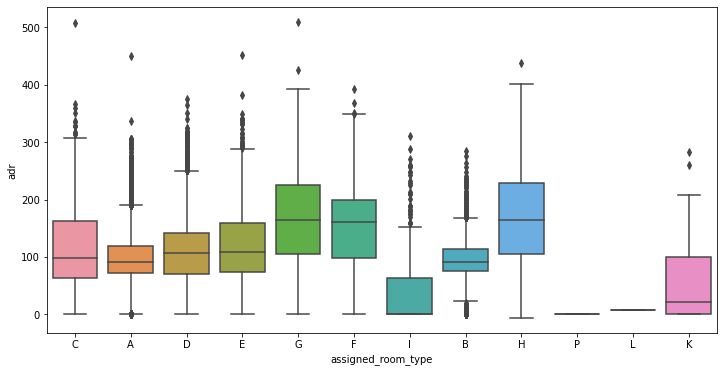

In [ ]:
plt.figure(figsize=(12,6))
sns.boxplot(x =hotel_boking_data['assigned_room_type'], y =hotel_boking_data ['adr'])
plt.show()

**Insight**

Better adr rooms  type H and G also c.Hotels should increase the no. of room  type H to maximise revenue.

**14.Which distribution channel is mostly used for booking hotel?**

In [ ]:
hotel_boking_data['distribution_channel'].value_counts()

TA/TO        69140
Direct       12988
Corporate     5081
GDS            181
Undefined        5
Name: distribution_channel, dtype: int64

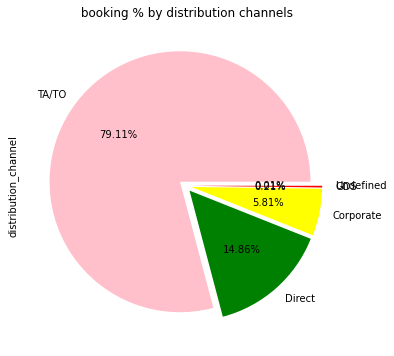

In [ ]:
plt.figure(figsize=(12,6))
hotel_boking_data['distribution_channel'].value_counts().plot.pie(explode=[0.05,0.05,0.05,0.05,0.05],colors=['pink','green','yellow','red','black'],autopct='%.2f%%',shadow=False)
plt.title(' booking % by distribution channels')
#plt.axis('equal')
plt.show()

**Insight**:

'TA/TO' is mostly(79.1%) used for booking hoetls.

 **15.Which year have highest booking?**

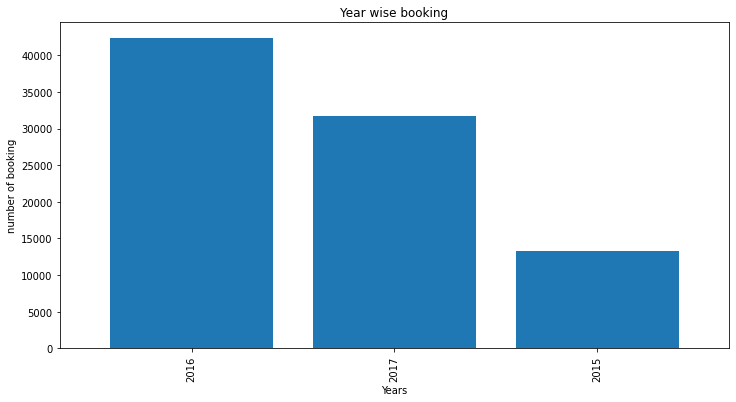

In [ ]:
plt.figure(figsize=(12,6))
hotel_boking_data['arrival_date_year'].value_counts().plot.bar( width=0.8,align='center')
plt.title('Year wise booking')
plt.xlabel('Years')
plt.ylabel('number of booking')
plt.show()

**Insight**:

2016 has the higest bookings.

## 3.**Bivariate Analysis**

**1.Which hotel has higest booking  year?**

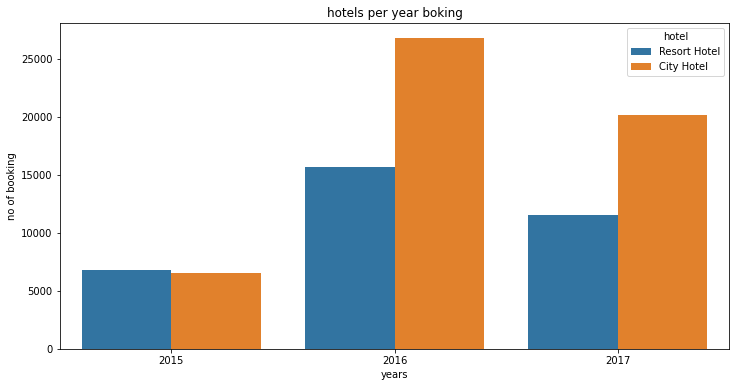

In [ ]:
plt.figure(figsize=(12,6))
sns.countplot(x=hotel_boking_data['arrival_date_year'],hue=hotel_boking_data['hotel'])
plt.title('hotels per year boking')
plt.xlabel('years')
plt.ylabel('no of booking')
plt.show()

**Insight**:

city hotel has highest booking year 2016

**2.Which hotel type has the highest ADR?**

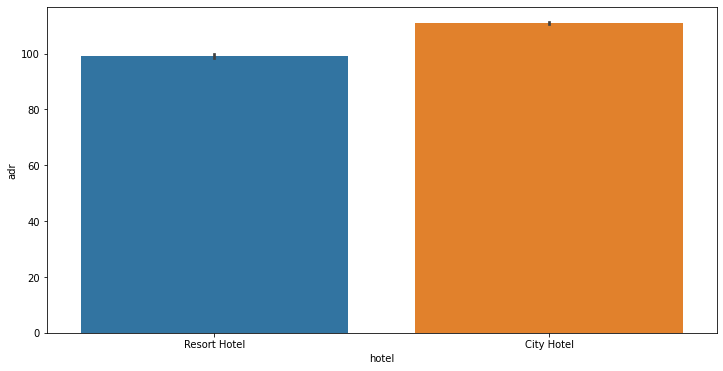

In [ ]:
plt.figure(figsize=(12,6))
sns.barplot(y=hotel_boking_data['adr'],x=hotel_boking_data['hotel'])
plt.show()

**Insight**

 adr of Resort hotel is slightly lower than that of City hotel. Hence, City hotel seems to be making slightly more revenue.
 more adr more revenue

**3.Which hotel has the higher lead time?**

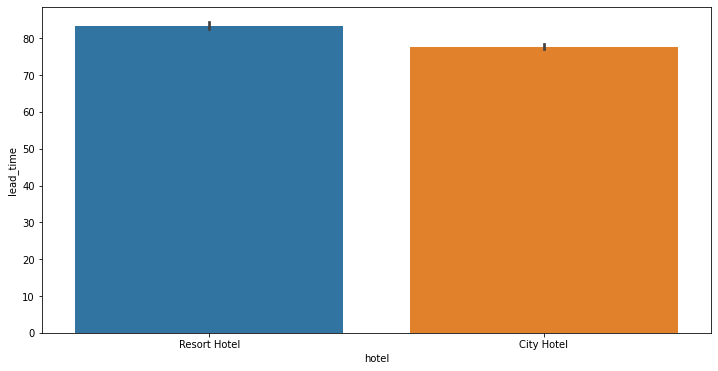

In [ ]:
plt.figure(figsize=(12,6))
sns.barplot(x=hotel_boking_data['hotel'],y=hotel_boking_data['lead_time'])
plt.show()


**Insight**:

Resort hotels has slightly high avg lead time. That means customers plan their trips very early.

**4.What is preferred stay length in each hotel?**

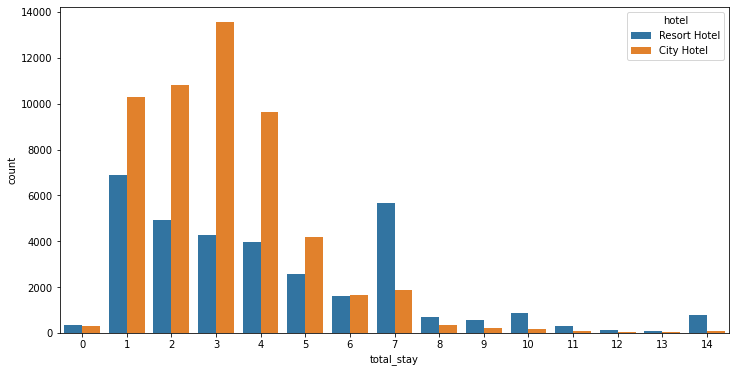

In [ ]:
plt.figure(figsize=(12,6))
b1=hotel_boking_data[hotel_boking_data['total_stay'] < 15]
sns.countplot(x=b1['total_stay'],hue=hotel_boking_data['hotel'])
plt.show()

**Insight**:

Most common stay length is less than 5 days and generally people prefer City hotel for short stay, but for long stays, Resort Hotel is preferred.

**5.Which hotel has most repeated guest?**

Text(0.5, 1.0, 'Most repeated guests for each hotel')

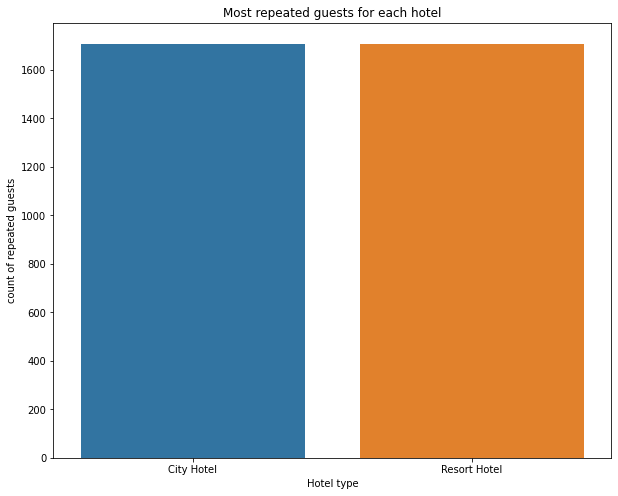

In [ ]:
repeated_guests_df=hotel_boking_data[hotel_boking_data['is_repeated_guest']==1].groupby('hotel').size().reset_index().rename(columns={0:'number_of_repated_guests'})



#set plot size adn plot barplot
plt.figure(figsize=(10,8))
sns.barplot(x=repeated_guests_df['hotel'],y=repeated_guests_df['number_of_repated_guests'])

# set labels
plt.xlabel('Hotel type')
plt.ylabel('count of repeated guests')
plt.title("Most repeated guests for each hotel")


**Insight**:

It is almost similar for both hotels.

**6.Which hotel has longer waiting time?**

Text(0.5, 1.0, 'Waiting time for each hotel type')

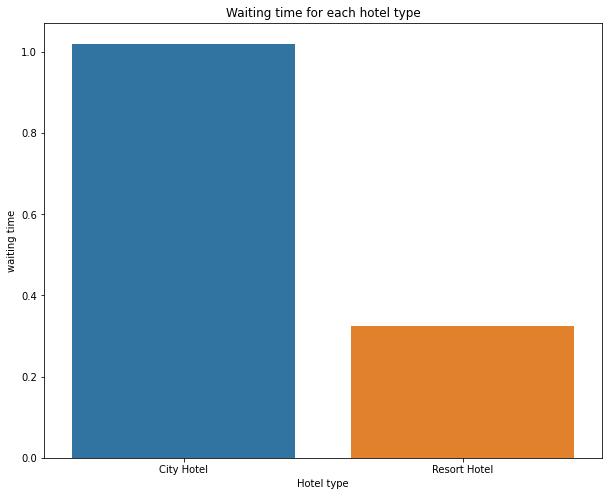

In [ ]:
waiting_time=hotel_boking_data.groupby('hotel')['days_in_waiting_list'].mean().reset_index()

#set the plot size
plt.figure(figsize=(10,8))

# plot barchart
sns.barplot(x=waiting_time['hotel'],y=waiting_time['days_in_waiting_list'])

#set labels
plt.xlabel('Hotel type')
plt.ylabel('waiting time')
plt.title("Waiting time for each hotel type")

**Insight**

City hotel has longer waiting time than resort hotel, hence City Hotel is much busier than Resort Hotel.

 **7.Which hotel has highest percentage of booking cancellation?**

Text(0.5, 1.0, 'Percentage of booking cancellation')

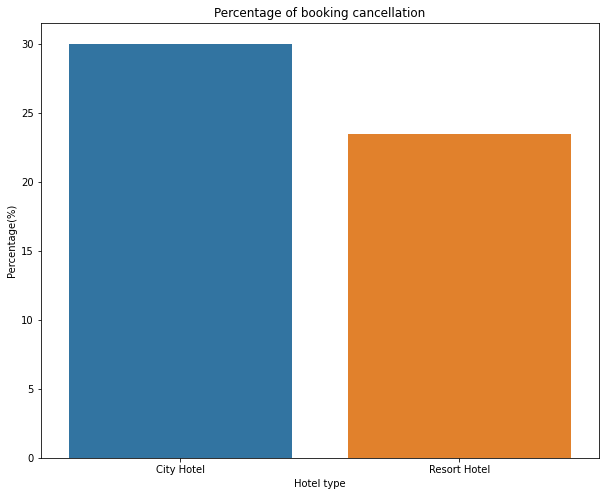

In [ ]:
canceled_df=hotel_boking_data[hotel_boking_data['is_canceled']==1]

# Grouping by hotel
canceled_df=canceled_df.groupby('hotel').size().reset_index().rename(columns={0: "no_of_cancelled_bookings"})

# adding 'total booking column for calculating the percentage.
canceled_df['total_booikngs']=hotel_boking_data.groupby('hotel').size().reset_index().rename(columns={0:"total_bookings"}).drop('hotel',axis=1)
canceled_df

#plotting the barchat
plt.figure(figsize=(10,8))
sns.barplot(x=canceled_df['hotel'],y=canceled_df['no_of_cancelled_bookings']*100/canceled_df['total_booikngs'])

#set labels
plt.xlabel('Hotel type')
plt.ylabel('Percentage(%)')
plt.title("Percentage of booking cancellation")

**Insight**:

Almost 30 % of City Hotel bookings got canceled.

**8.Which distribution channel contributed more to adr in order to increase  the income?**

Text(0.5, 1.0, 'ADR across Distribution channel')

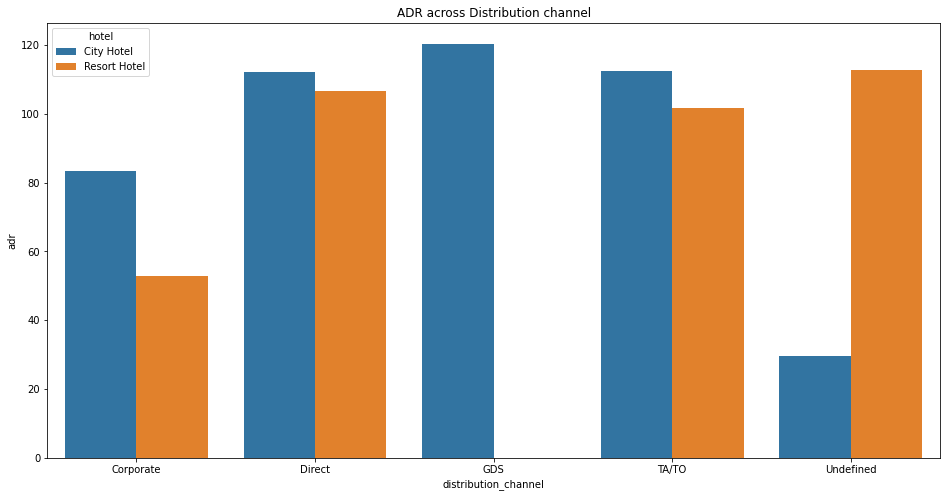

In [ ]:
distribution_channel_df=hotel_boking_data.groupby(['distribution_channel','hotel'])['adr'].mean().reset_index()

# set plot size and plot barchart
plt.figure(figsize=(16,8))
sns.barplot(x='distribution_channel', y='adr', data=distribution_channel_df, hue='hotel')
plt.title('ADR across Distribution channel')

**Insight**

From the plot is clear that
'Direct' and 'TA/TO' has almost equally contributed in adr in both type of hotels i.e. 'City Hotel' and 'Resort Hotel'.
GDS has highly contributed in adr in 'City Hotel' type.
GDS needs to increase Resort Hotel bookings.

**9.Which Market Segment has the higest cancellation rate?**

Text(0.5, 1.0, 'Cancellation Rate Vs market_segment')

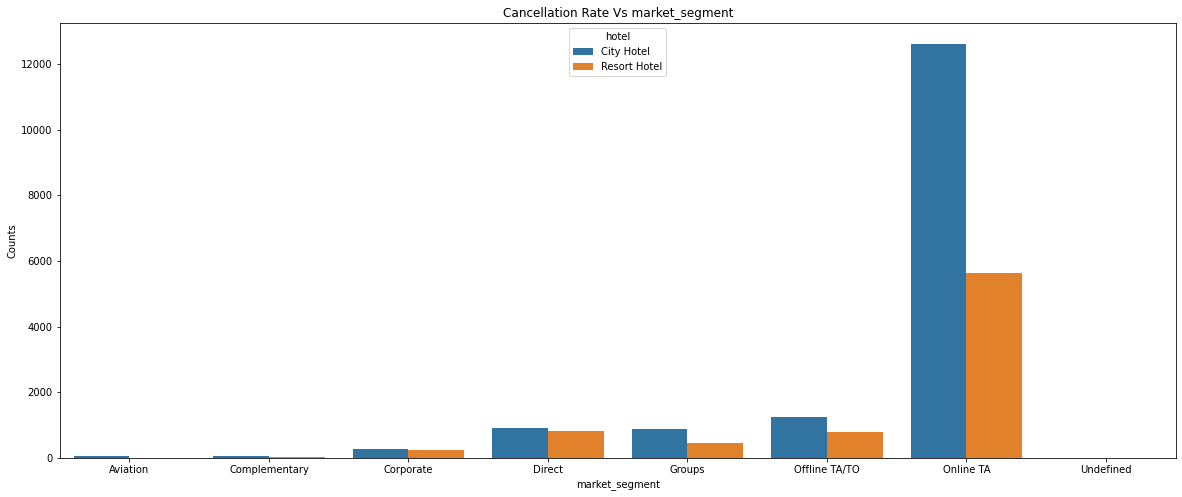

In [ ]:
market_segment_df=hotel_boking_data[hotel_boking_data['is_canceled']==1]   # canceled=1
market_segment_df=market_segment_df.groupby(['market_segment','hotel']).size().reset_index().rename(columns={0:'counts'})   
#set plotsizde and plot barchart
plt.figure(figsize=(20,8))
sns.barplot(x='market_segment',y='counts',hue="hotel",data= market_segment_df)

# set labels
plt.xlabel('market_segment')
plt.ylabel('Counts')
plt.title('Cancellation Rate Vs market_segment')

**Insight**

Online T/A' has the highest cancellation in both type of cities

# **Conclusions**:


  * City hotels are the most preferred hotel type by the guests. We can say City hotel is the busiest hotel.
  * Most number of bookings are made in July and August.
  * agent iD no 9 made  most number of  booking
  * The length of the stay decreases as ADR increases probably to reduce the cost.
  * Room Type A is the most preferred room type among guests.
  * 27.5 % bookings were got cancelled out of all the bookings.
  * Only 3.9 % people were revisited the hotels. Rest 96.1 % were new guests. Thus retention rate is low.
  * The percentage of 0 changes made in the booking was more than 82 %.    Percentage of Single changes made was about 10%.
  * Most of the customers (91.6%) do not require car parking spaces.
  * 79.1 % bookings were made through TA/TO (travel agents/Tour operators).
  * BB( Bed & Breakfast) is the most preferred type of meal by the guests.
  * Maximum number of guests were from Portugal, i.e. more than 25000 guests
  * Most of the bookings for City hotels and Resort hotel were happened in 2016.
  *  Average ADR for city hotel is high as compared to resort hotels. These City hotels are generating more revenue than the resort hotels.
  * Booking cancellation rate is high for City hotels which almost 30 %.
  * Average lead time for resort hotel is high.
  * Waiting time period for City hotel is high as compared to resort hotels. That means city hotels are much busier than Resort hotels.
  * Optimal stay in both the type hotel is less than 5 days.